In [56]:
import pandas as pd
import numpy as np

In [57]:
df=pd.read_csv("combined_dataset1.csv")
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_slash,nb_semicolumn,...,safe_anchor,empty_title,domain_in_title,domain_with_copyright,domain_registration_length,domain_age,dns_record,google_index,page_rank,status
0,-0.969306,-0.857143,-1.0,-0.826087,-1.000000,-1.0,-1.000000,-1.000000,-0.935484,-1.0,...,-1.00,-1.0,-1.0,1.0,-0.996916,-0.998293,1.0,1.0,-0.2,0
1,-0.920196,-0.819048,1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-0.806452,-1.0,...,1.00,-1.0,1.0,-1.0,-0.994770,-0.103058,-1.0,1.0,-0.6,1
2,-0.860037,-0.561905,1.0,-0.739130,-0.953488,-1.0,-0.333333,-0.789474,-0.806452,-1.0,...,1.00,-1.0,1.0,-1.0,-0.998994,-0.376688,-1.0,1.0,-1.0,1
3,-0.992634,-0.933333,-1.0,-0.913043,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.0,...,0.25,-1.0,1.0,-1.0,-0.995776,-0.998293,-1.0,-1.0,-0.4,0
4,-0.947207,-0.895238,-1.0,-0.913043,-0.906977,-1.0,-1.000000,-1.000000,-0.806452,-1.0,...,-1.00,-1.0,-1.0,1.0,-0.984915,0.270681,-1.0,-1.0,0.2,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16430 entries, 0 to 16429
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  16430 non-null  float64
 1   length_hostname             16430 non-null  float64
 2   ip                          16430 non-null  float64
 3   nb_dots                     16430 non-null  float64
 4   nb_hyphens                  16430 non-null  float64
 5   nb_at                       16430 non-null  float64
 6   nb_qm                       16430 non-null  float64
 7   nb_and                      16430 non-null  float64
 8   nb_slash                    16430 non-null  float64
 9   nb_semicolumn               16430 non-null  float64
 10  nb_www                      16430 non-null  float64
 11  nb_com                      16430 non-null  float64
 12  https_token                 16430 non-null  float64
 13  ratio_digits_url            164

In [59]:
df["status"].value_counts()

1    8253
0    8177
Name: status, dtype: int64

<Axes: >

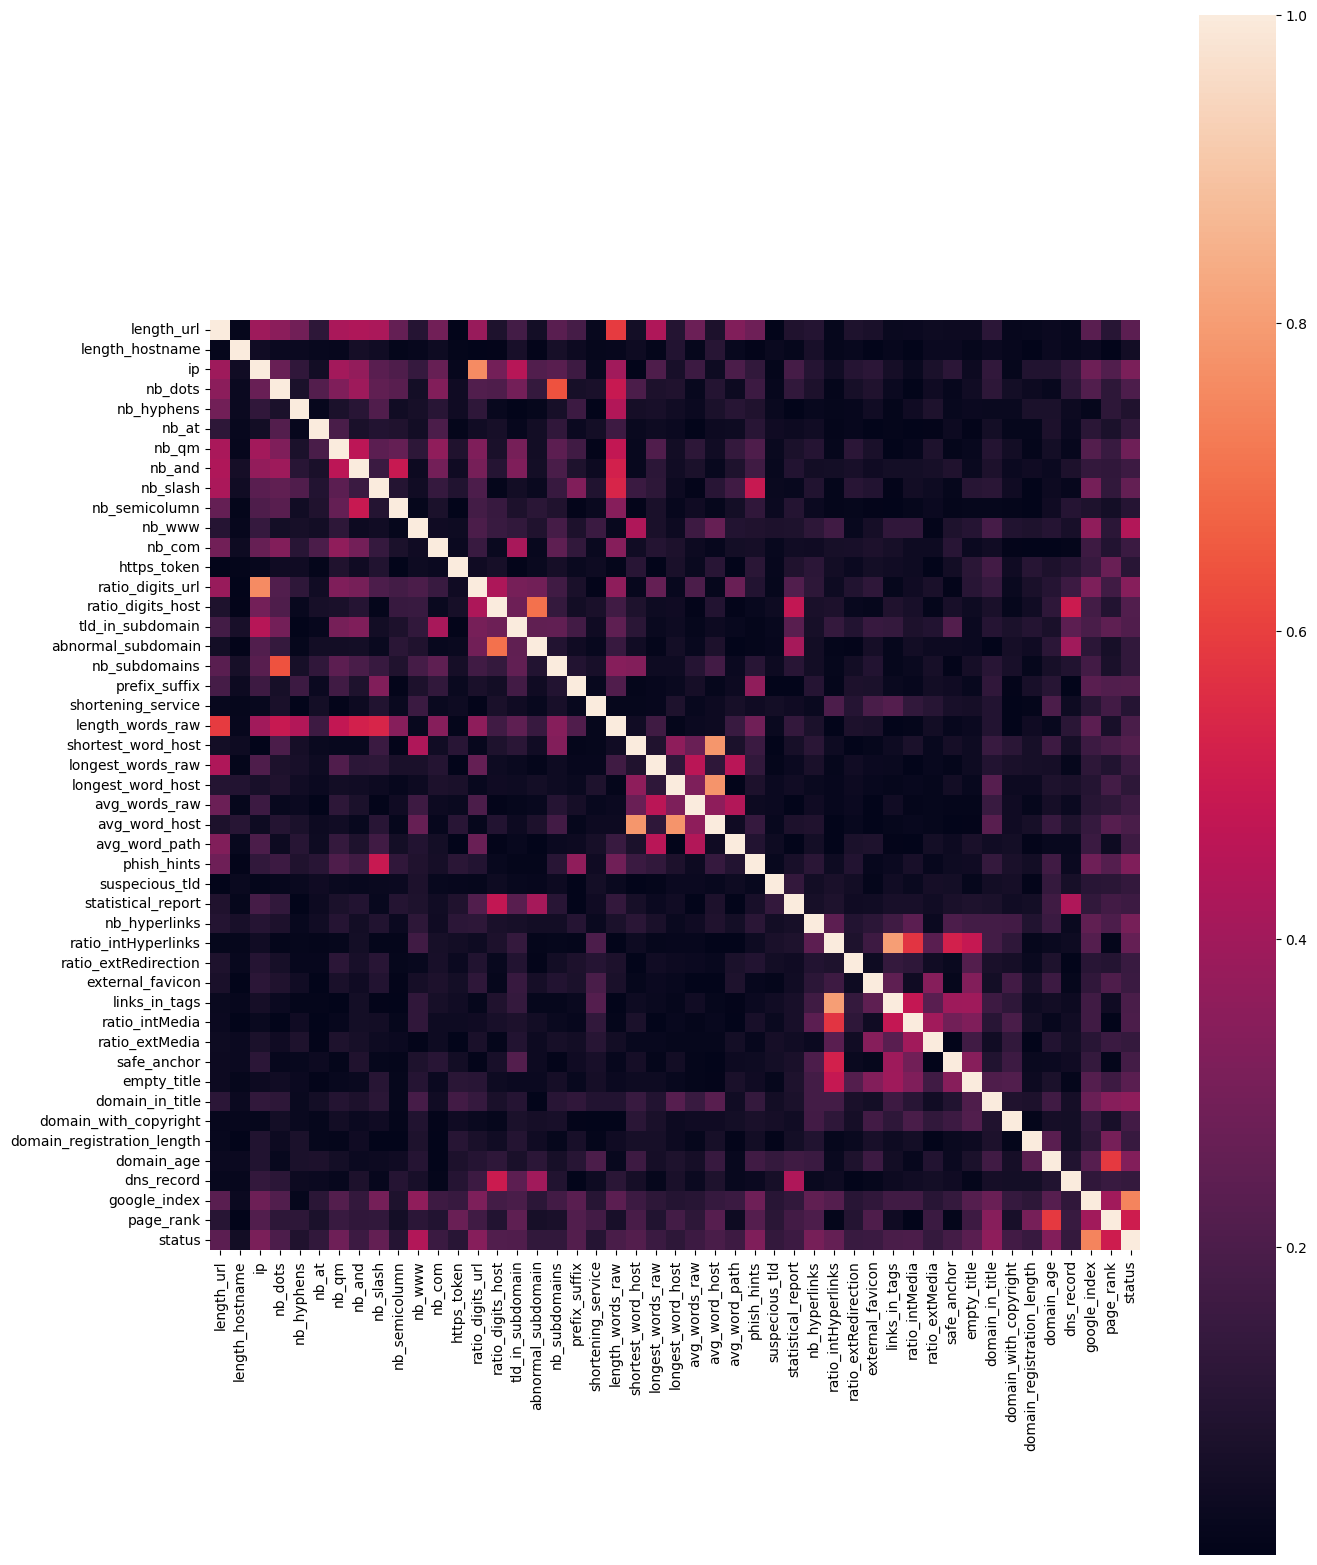

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr().abs()
plt.figure(figsize=(15,20))
sns.heatmap(corr, vmax=1, square=True)

In [61]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [62]:
X = df.drop(columns=["status"])
y = df["status"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [64]:
rf_pipeline = Pipeline([                   
    ("rf", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    ))
])


In [65]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Set experiment
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Random forest")

# Start run
with mlflow.start_run():

    # Train your Random Forest pipeline
    rf_pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = rf_pipeline.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # Log classification report
    report = classification_report(y_test, y_pred)
    mlflow.log_text(report, "classification_report.txt")

    # Log model (this is the key part to make it appear in UI)
    mlflow.sklearn.log_model(
        sk_model=rf_pipeline,
        name="rf_pipeline",
        input_example=X_train.head(1)  # optional, removes warning
    )

    print("✅ Model, metrics, and report logged successfully!")


C:\Users\Aniket\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


✅ Model, metrics, and report logged successfully!
🏃 View run melodic-stoat-85 at: http://127.0.0.1:5000/#/experiments/293335267424202659/runs/8c93e3b3d4784a49a03fc263a5cab65f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/293335267424202659


In [49]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)


mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("logistic_regression")

with mlflow.start_run():

    log_reg.fit(X_train, y_train)
    
    
    y_pred = log_reg.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    

    mlflow.log_text(classification_report(y_test, y_pred), "classification_report.txt")
    
    
    mlflow.sklearn.log_model(
        sk_model=log_reg,
        artifact_path="model",
        input_example=X_train[:2]
    )

print("Training + logging complete! 🚀")


2025/09/26 15:16:53 INFO mlflow.tracking.fluent: Experiment with name 'logistic_regression' does not exist. Creating a new experiment.
2025/09/26 15:16:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\Aniket\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for mor

🏃 View run blushing-skink-22 at: http://127.0.0.1:5000/#/experiments/292029843554028778/runs/65e9625b1576469f9d883d29b4755cd7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/292029843554028778
Training + logging complete! 🚀


In [50]:
import mlflow
import mlflow.sklearn
from sklearn.svm import SVC

svm_model = SVC(kernel="linear", probability=True, random_state=42)


mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("svm_classifier")

with mlflow.start_run():
    
    svm_model.fit(X_train, y_train)
    
    
    y_pred = svm_model.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    
    
    mlflow.log_text(classification_report(y_test, y_pred), "classification_report.txt")
    
    
    mlflow.sklearn.log_model(
        sk_model=svm_model,
        artifact_path="model",
        input_example=X_train[:2]
    )

print("SVM training + logging complete! 🚀")


2025/09/26 15:22:04 INFO mlflow.tracking.fluent: Experiment with name 'svm_classifier' does not exist. Creating a new experiment.
2025/09/26 15:22:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\Aniket\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more det

🏃 View run amusing-moose-166 at: http://127.0.0.1:5000/#/experiments/583937876634669626/runs/32dce7012cfc40cdb33850ec22743611
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/583937876634669626
SVM training + logging complete! 🚀


In [51]:
import mlflow
import mlflow.xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)


mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("xgboost_classifier")

with mlflow.start_run():
    
    xgb_model.fit(X_train, y_train)
    
    
    y_pred = xgb_model.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    
    
    mlflow.log_text(classification_report(y_test, y_pred), "classification_report.txt")
    
    
    mlflow.xgboost.log_model(
        xgb_model,
        artifact_path="model",
        input_example=X_train[:2]
    )

print("XGBoost training + logging complete! 🚀")


2025/09/26 15:36:08 INFO mlflow.tracking.fluent: Experiment with name 'xgboost_classifier' does not exist. Creating a new experiment.
C:\Users\Aniket\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:36:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
2025/09/26 15:36:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\Aniket\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the m

🏃 View run melodic-snake-115 at: http://127.0.0.1:5000/#/experiments/424387800987447606/runs/5d0aa120663b4f60a455458fbc140150
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/424387800987447606
XGBoost training + logging complete! 🚀


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"f{i}" for i in range(X_train.shape[1])]

xgb_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(xgb_importance)


NameError: name 'X_train' is not defined